In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
stocks = yf.Tickers("AAPL AMZN")
hist = stocks.history(start="2000-01-01", end="2021-03-31")
prices = hist["Close"]
prices.tail()

[*********************100%%**********************]  2 of 2 completed


,AAPL,AMZN
Date,,
2021-03-24,118.337929,154.353500
2021-03-25,118.830635,152.313004
2021-03-26,119.441589,152.601501
2021-03-29,119.618973,153.786499
2021-03-30,118.150711,152.764496


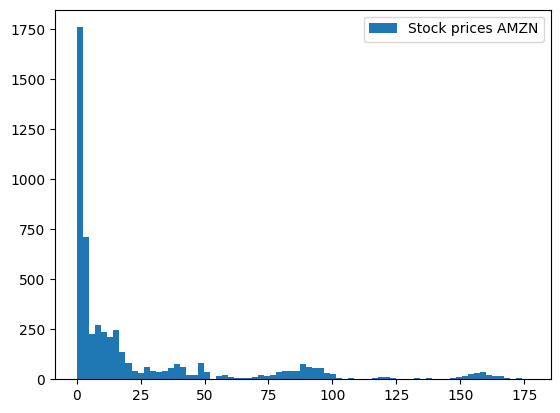

In [10]:
plt.hist(prices["AMZN"], bins=75, label="Stock prices AMZN")
plt.legend()
plt.show()

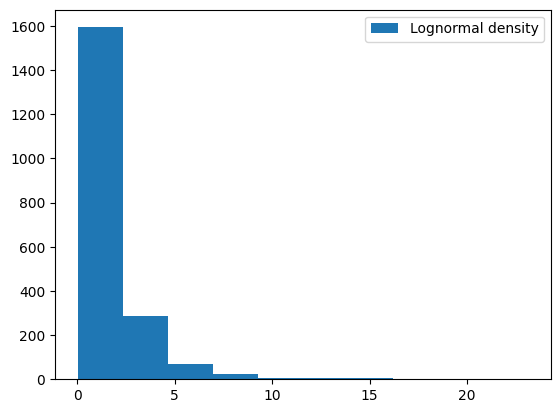

In [16]:
import numpy as np
from scipy.stats import lognorm,norm
r = lognorm.rvs(1, size=2000)
plt.hist(r, label="Lognormal density")
plt.legend()
plt.show()

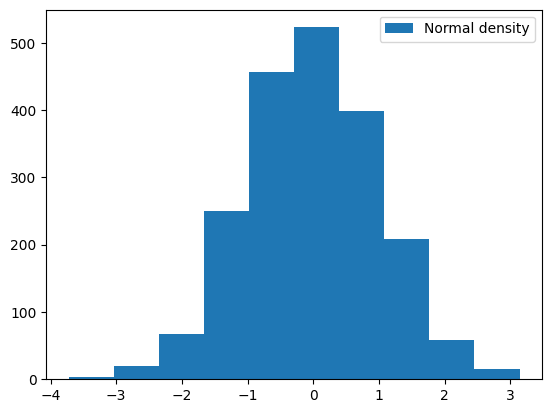

In [17]:
s = np.log(r)
plt.hist(s, label="Normal density")
plt.legend()
plt.show()

## **Pricing a Call Option with Black-Scholes**

$c = S_0 \mathcal{N}(d_1) - K e^{-rT}\mathcal{N}(d_2) $

In [18]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [19]:
print(bs_call_price(100.0, 0.0, 0.2, 0, 2.0, 105.0))

9.19735064929452


In [20]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 2.0  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 105.0
r = 0
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 9.197350649294513
Delta = 0.4876036978454982
Gamma = 0.014097929791127266
Vega = 56.39171916450907
Theta = -2.819585958225453
Rho = 79.1260382705106
